In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
%matplotlib inline

In [3]:
data = pd.read_csv('Winequality.csv')
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# MISSING VALUES AND EXPLORING DATA

In [5]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().any().any()

False

In [7]:
data.rename(columns={'fixed acidity': 'fixed_acidity',
                     'citric acid':'citric_acid',
                     'volatile acidity':'volatile_acidity',
                     'residual sugar':'residual_sugar',
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'},
            inplace=True)

In [8]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

# GRAPHICAL ANALYSIS

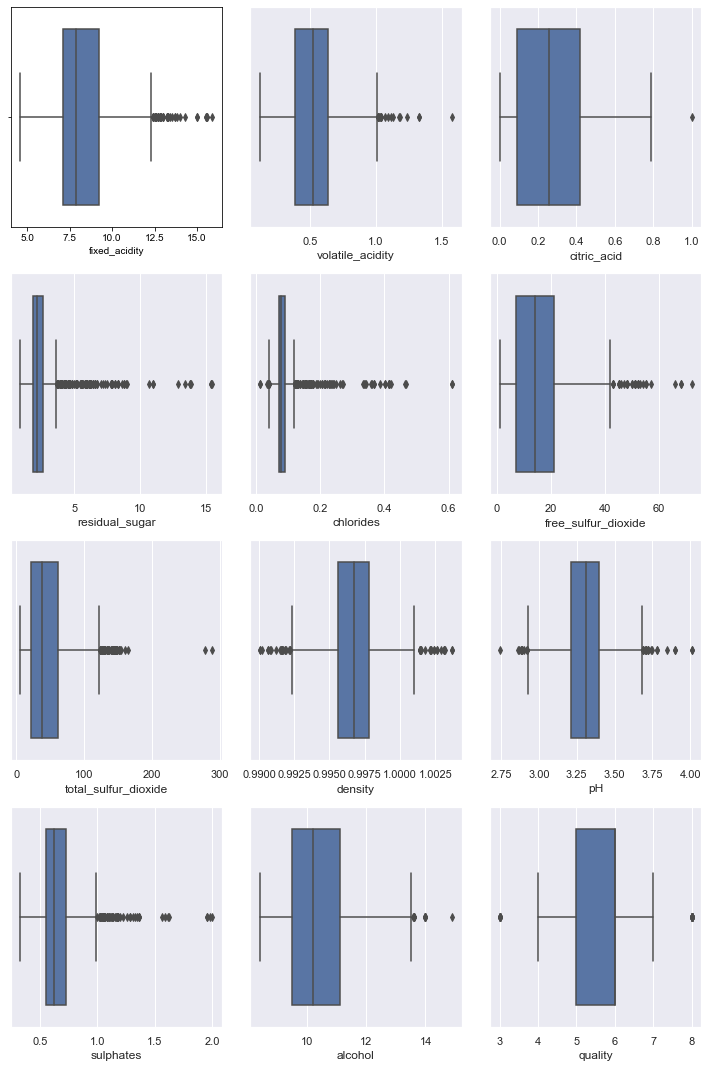

In [11]:
plt.figure(figsize=(10,15))

for pl,col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,pl+1)
    sns.set()
    sns.boxplot(col,data=data)
    plt.tight_layout()

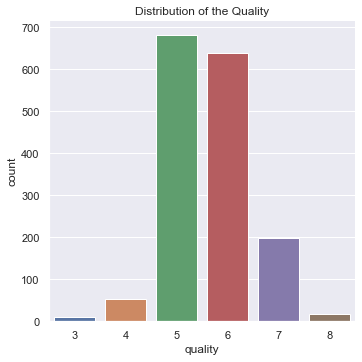

In [12]:
sns.catplot(x='quality', data=data, kind='count');
plt.title('Distribution of the Quality');

# CORRELATION ANALYSIS:

In [13]:
# PAIR PLOT
# BOX PLOTS,
# VIOLIN PLOTS
# SWARM LOTS
# LM PLOTS
# SCATTER DIAGRAMS
# DATA DISTRIBUTION PLOTS
# DATA ANALYSIS

In [14]:
data.corr()['quality'].sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

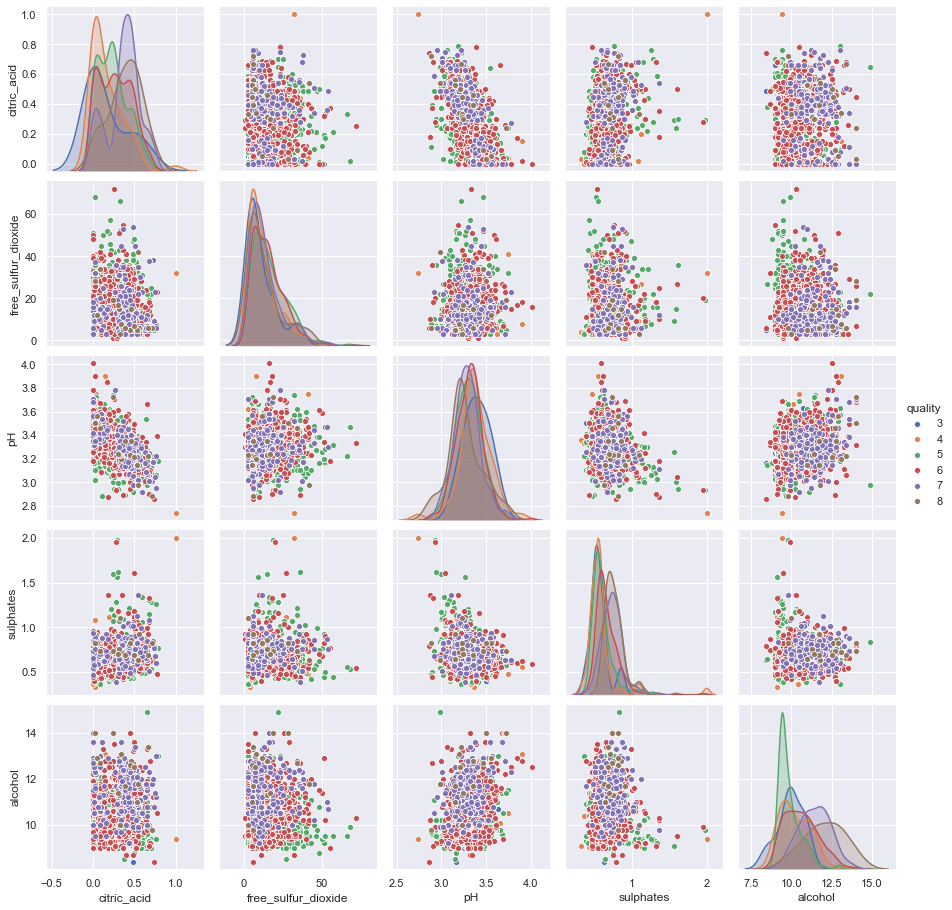

In [15]:
data_Cor = data.drop(['fixed_acidity', 'volatile_acidity', 'density', 'residual_sugar', 
                      'chlorides','total_sulfur_dioxide'], axis=1)
sns.pairplot(data_Cor,hue = 'quality');

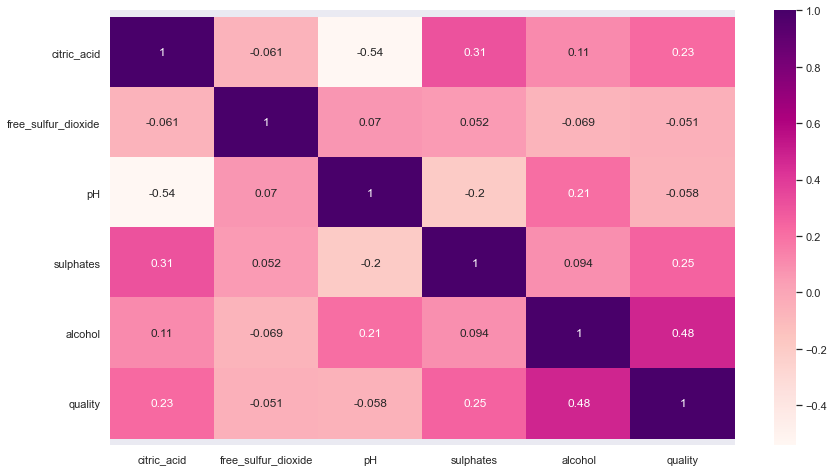

In [16]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(data_Cor.corr(), annot = True, cmap='RdPu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.1, top - 0.1);

In [17]:
# Analysing each attribute

data['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [18]:
data['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [19]:
data['free_sulfur_dioxide'].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free_sulfur_dioxide, dtype: float64

In [20]:
data['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [21]:
data.iloc[:,:11].head() #Removing the quality column

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


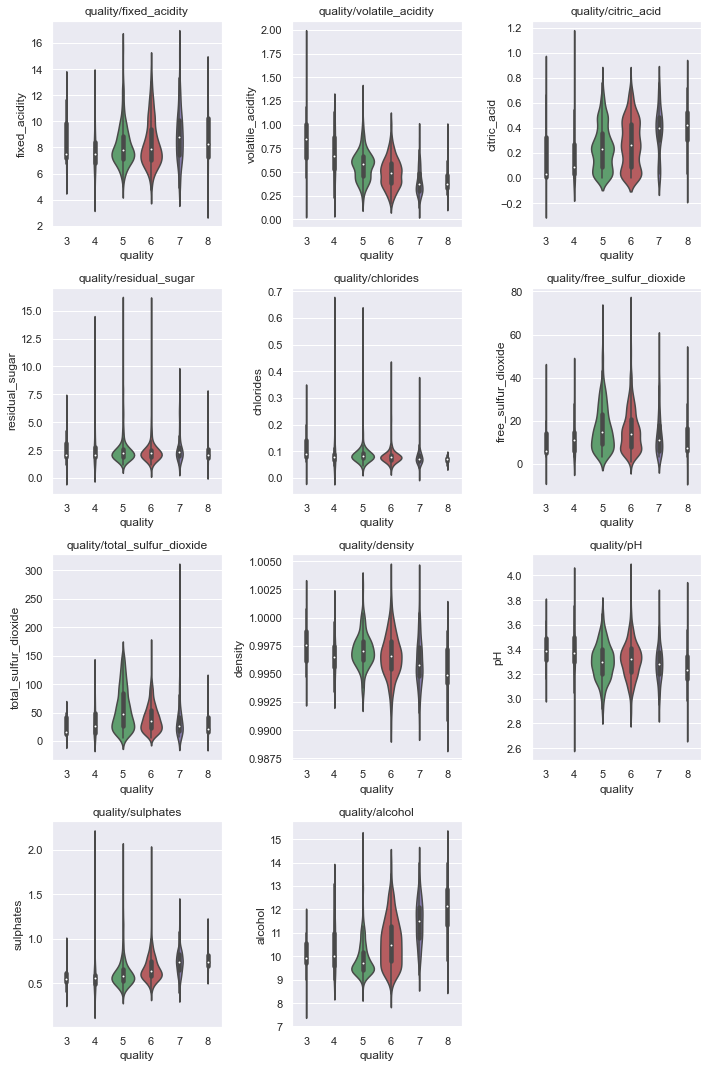

In [22]:
plt.figure(figsize=(10,15))

for pl,col in enumerate(list(data.iloc[:,:11].columns.values)):
    plt.subplot(4,3,pl+1)
    sns.violinplot(y= data[col],x='quality',data=data, scale='count')
    plt.title(f'quality/{col}')
    plt.tight_layout()

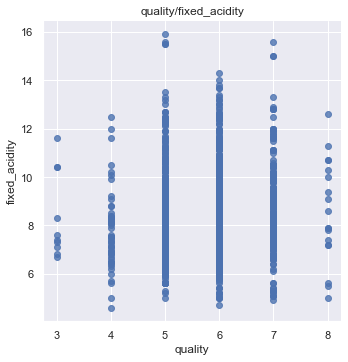

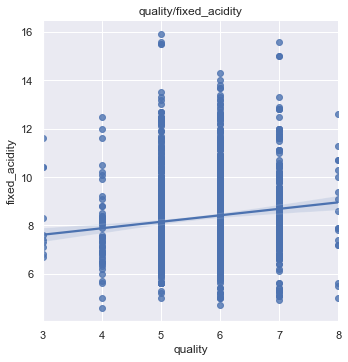

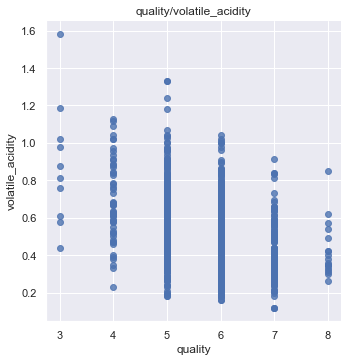

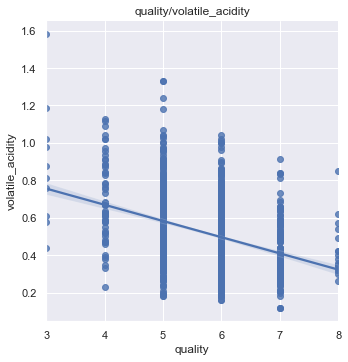

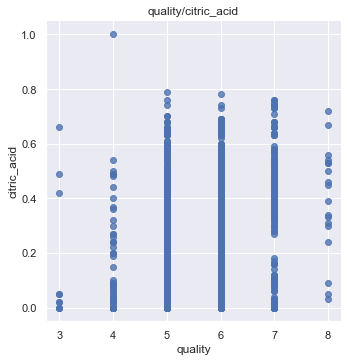

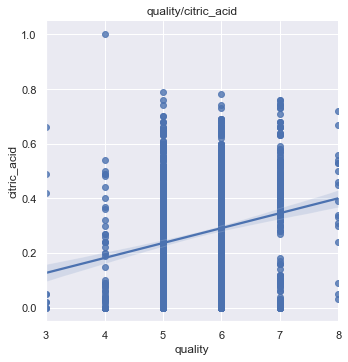

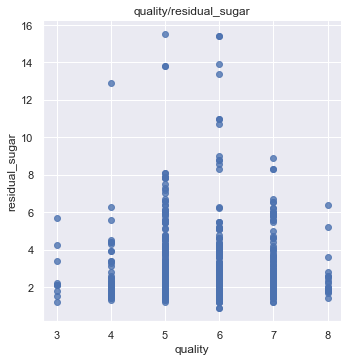

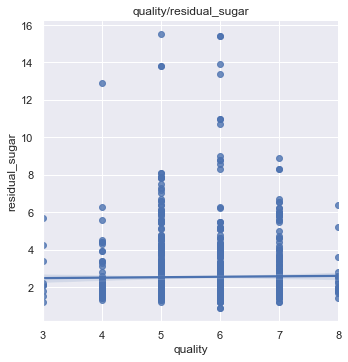

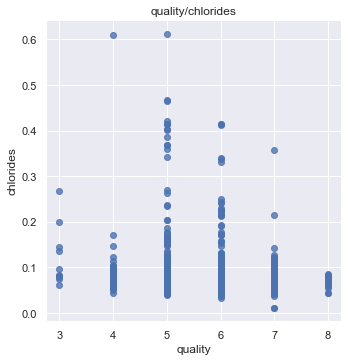

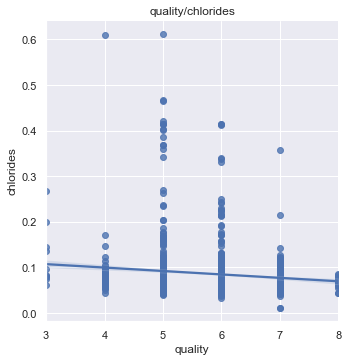

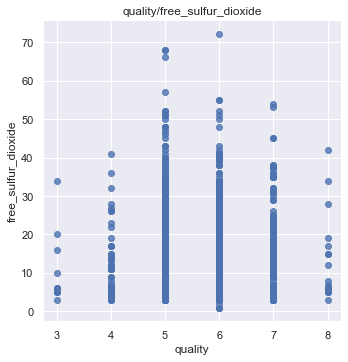

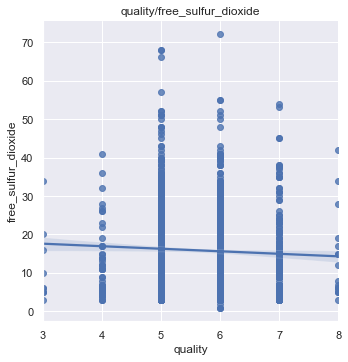

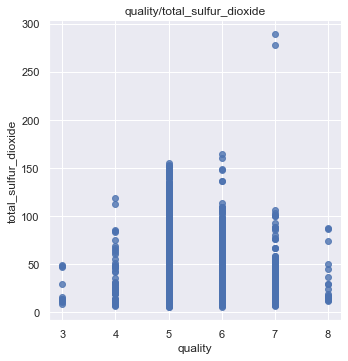

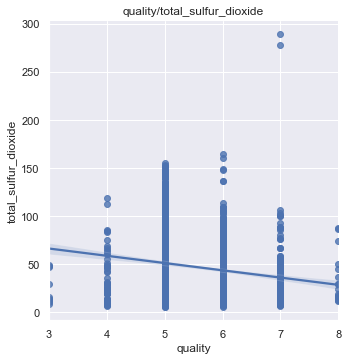

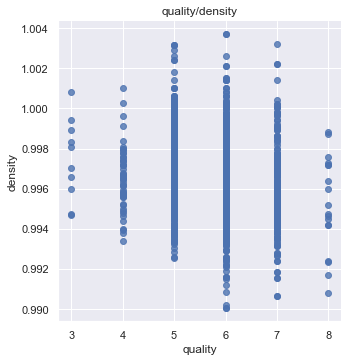

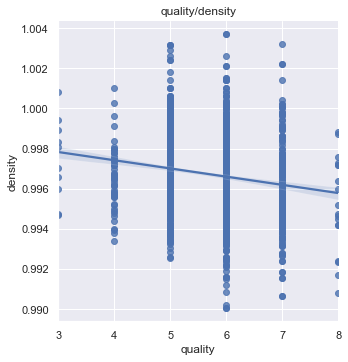

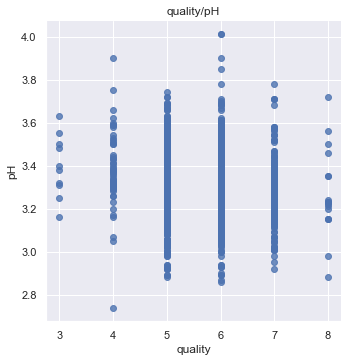

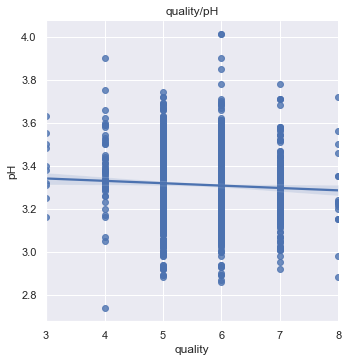

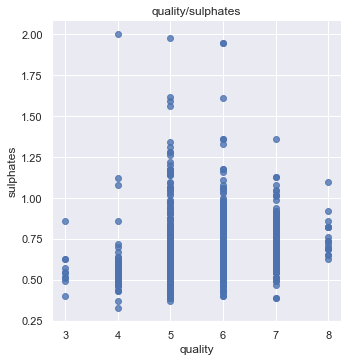

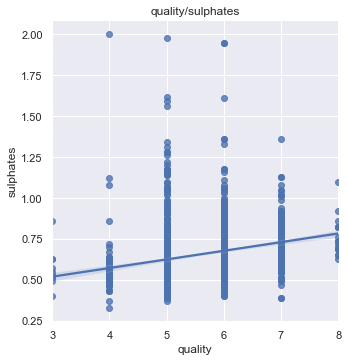

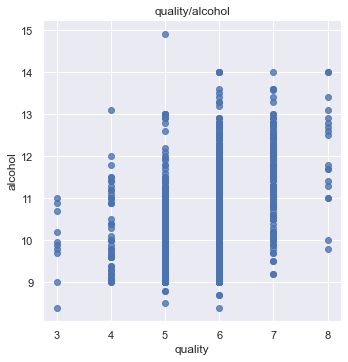

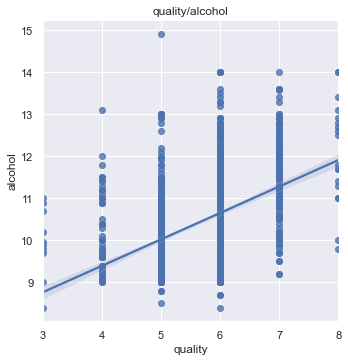

In [23]:
for col in (data.iloc[:,:11].columns.values):
 
    sns.lmplot(x='quality',y=col,data=data, fit_reg=False)
  
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    sns.lmplot(x='quality',y=col,data=data)
  
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    print('   ')

In [24]:
condition = [(data['quality']>6),(data['quality']<=4)]#Setting the condition for good and bad ratings

rating = ['good','bad']

In [25]:
data['rating'] = np.select(condition,rating,default='average')
data.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [26]:
data.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


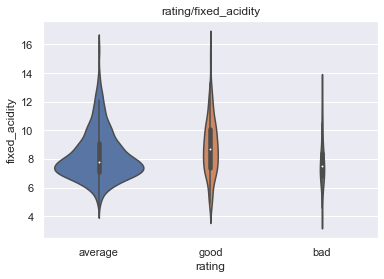

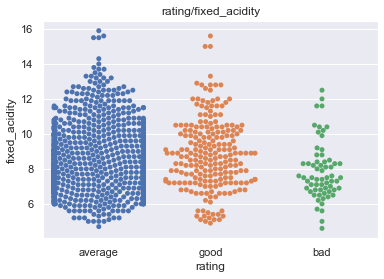

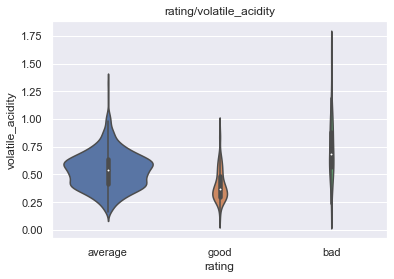

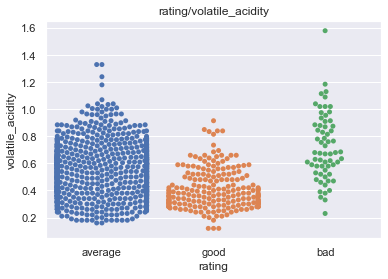

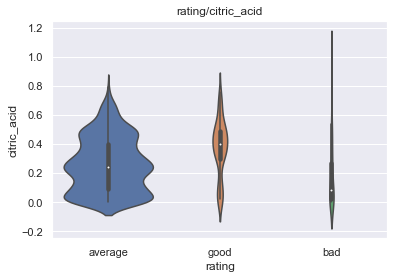

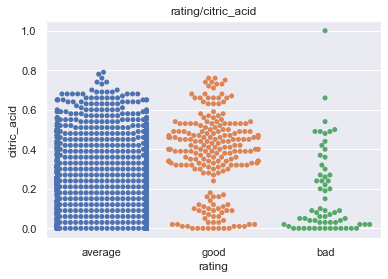

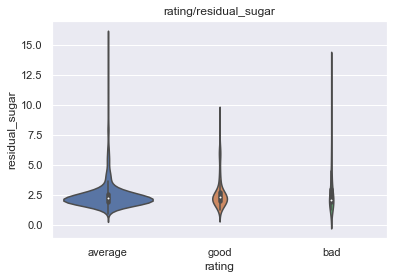

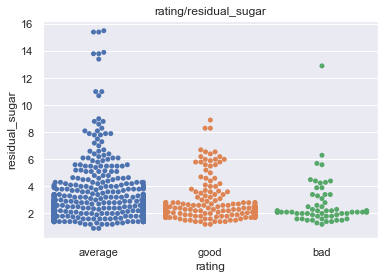

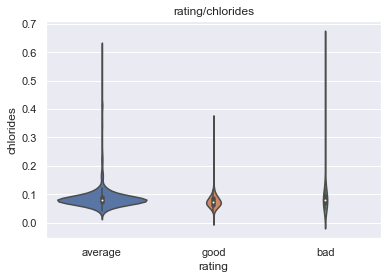

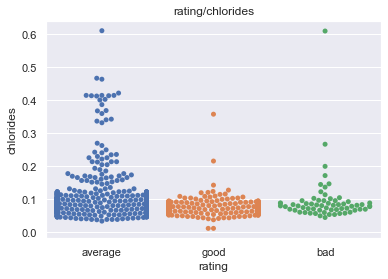

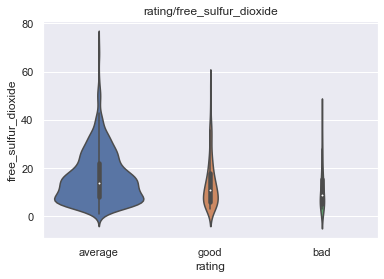

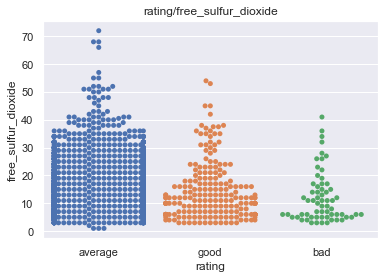

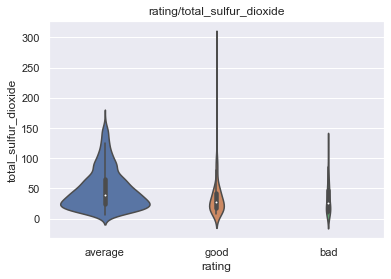

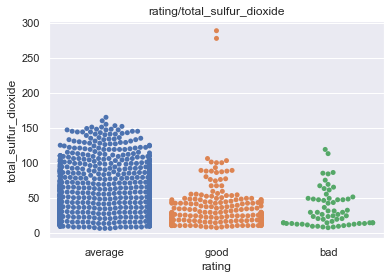

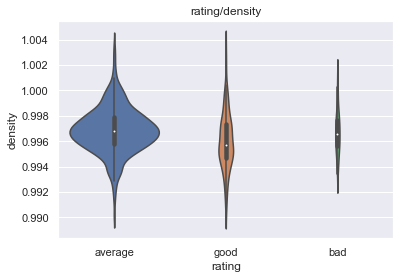

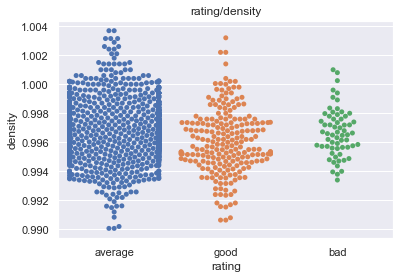

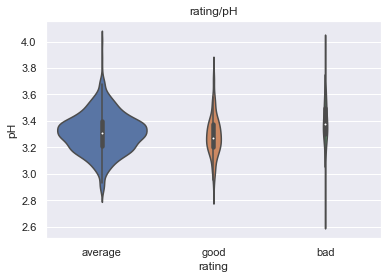

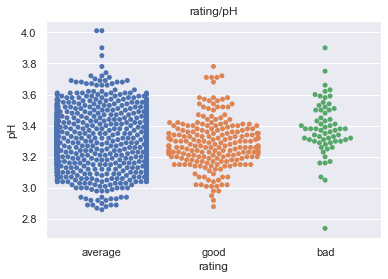

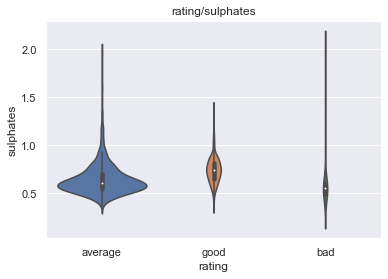

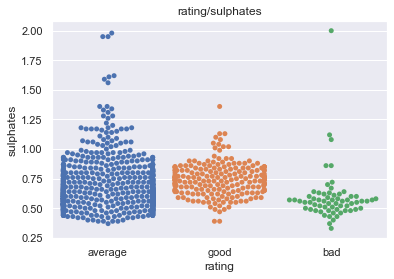

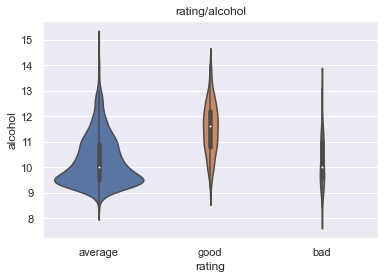

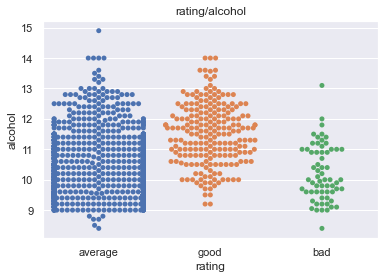

In [27]:
for col in data.iloc[:,:11].columns.values:
 
    
    sns.set()
    sns.violinplot(y= col ,x='rating',data=data, scale='count')
    plt.title(f'rating/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    sns.set()
    sns.swarmplot(x='rating',y=col,data=data)
    plt.title(f'rating/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    print('   ')


In [28]:
data[[('rating'),('quality')]].head(25)

,rating,quality
0,average,5
1,average,5
2,average,5
3,average,6
4,average,5
5,average,5
6,average,5
7,good,7
8,good,7
9,average,5


In [29]:
data.groupby('rating')['quality'].value_counts()

rating   quality
average  5          681
         6          638
bad      4           53
         3           10
good     7          199
         8           18
Name: quality, dtype: int64

# DATA FITTING AND TRANSFORMATION

In [30]:
#This changes the quality from numbers to ratings between good and bad

bins = (2, 4, 9)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [31]:
data.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,good,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,good,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,good,average


In [32]:
data[[('rating'),('quality')]].head(25)

,rating,quality
0,average,good
1,average,good
2,average,good
3,average,good
4,average,good
5,average,good
6,average,good
7,good,good
8,good,good
9,average,good


In [33]:
#This basically maps all good values to 1 and all bad values to 0 in the quality column

dfL = np.array(data['quality'])

dfL = pd.DataFrame(dfL)

data['quality'] = dfL.apply(lambda x: x.map({'good':1,'bad':0})) 

In [34]:
data.head(30)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,average


In [35]:
data[[('rating'),('quality')]].head(25)

,rating,quality
0,average,1
1,average,1
2,average,1
3,average,1
4,average,1
5,average,1
6,average,1
7,good,1
8,good,1
9,average,1


In [36]:
#Setting the values of X and Y

X =  data[['alcohol','density','sulphates','pH','free_sulfur_dioxide','citric_acid']]
y =  data['quality']

In [37]:
# X_tr is training data for x
# X_t is testing data for x
# y_tr is training data for y
# y_t is testing data for y

In [38]:
X_tr,X_t,y_tr,y_t = train_test_split(X,y)

In [39]:
X_tr.shape, X_t.shape

((1199, 6), (400, 6))

In [40]:
y_tr.shape, y_t.shape

((1199,), (400,))

In [41]:
stds= StandardScaler()

In [42]:
X_tr= stds.fit_transform(X_tr)
X_t = stds.fit_transform(X_t)

# DATA MODELLING: PREDICTING QUALITY:

In [43]:
# LOGISTIC REGRESSION
# RANDOM FOREST
# GAUSSIAN NORMAL DISTRIBUTION
# SUPPORT VECTOR CLASSIFIER
# DESCISION TREE
# STOCHASTIC GRADIENT DESCENT

In [44]:
#The functions below will be used to measure the accuracy of the model

def generateClassificationReport_Tr(y_true,y_pred):
    '''Train data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTrain Accuracy is: ',
          round(100*accuracy_score(y_true,y_pred),3),'%\n');
    
def generateClassificationReport_T(y_true,y_pred):
    '''Test data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTest Accuracy is: ',
          round(100*accuracy_score(y_true,y_pred),3),'%\n');

# LOGISTIC REGRESSION

In [45]:
#LOGISTIC REGRESSION

logr = LogisticRegression(max_iter=1000);
logr.fit(X_tr,y_tr);

In [46]:
#TRAIN DATA

ytr_pred = logr.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.96      1.00      0.98      1157

    accuracy                           0.96      1199
   macro avg       0.48      0.50      0.49      1199
weighted avg       0.93      0.96      0.95      1199

[[   0   42]
 [   0 1157]]


Train Accuracy is:  96.497 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#TEST DATA

yt_pred = logr.predict(X_t)
generateClassificationReport_T(y_t,yt_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.95      1.00      0.97       379

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

[[  0  21]
 [  0 379]]


Test Accuracy is:  94.75 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RANDOM FOREST

In [48]:
#RANDOM FOREST

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_tr,y_tr);

In [49]:
#TRAIN DATA

ytr_pred = rfc.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00      1157

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

[[  42    0]
 [   0 1157]]


Train Accuracy is:  100.0 %



In [50]:
#TEST DATA

yt_pred = rfc.predict(X_t);
generateClassificationReport_T(y_t,yt_pred);

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.95      1.00      0.97       379

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

[[  0  21]
 [  0 379]]


Test Accuracy is:  94.75 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GAUSSIAN NORMAL DISTRIBUTION

In [51]:
#GAUSSIAN NORMAL DISTRIBUTION 

gnd = GaussianNB()
gnd.fit(X_tr,y_tr);

In [52]:
#TRAIN DATA

ytr_pred = gnd.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       0.08      0.02      0.04        42
           1       0.97      0.99      0.98      1157

    accuracy                           0.96      1199
   macro avg       0.52      0.51      0.51      1199
weighted avg       0.93      0.96      0.94      1199

[[   1   41]
 [  12 1145]]


Train Accuracy is:  95.58 %



In [53]:
#TEST DATA

yt_pred = gnd.predict(X_t)
generateClassificationReport_T(y_t,yt_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.95      0.99      0.97       379

    accuracy                           0.94       400
   macro avg       0.47      0.49      0.48       400
weighted avg       0.90      0.94      0.92       400

[[  0  21]
 [  4 375]]


Test Accuracy is:  93.75 %



# SUPPORT VECTOR CLASSIFIER

In [54]:
#SUPPORT VECTOR CLASSIFIER

svc = SVC()
svc.fit(X_tr,y_tr);

In [55]:
#TRAIN DATA

ytr_pred = svc.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        42
           1       0.97      1.00      0.98      1157

    accuracy                           0.97      1199
   macro avg       0.98      0.51      0.51      1199
weighted avg       0.97      0.97      0.95      1199

[[   1   41]
 [   0 1157]]


Train Accuracy is:  96.58 %



In [56]:
#TEST DATA

yt_pred = svc.predict(X_t)
generateClassificationReport_T(y_t,yt_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.95      1.00      0.97       379

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

[[  0  21]
 [  0 379]]


Test Accuracy is:  94.75 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DESCISION TREE

In [57]:
#DESCISION TREE

dtc = DecisionTreeClassifier()
dtc.fit(X_tr,y_tr);

In [58]:
#TRAIN DATA

ytr_pred = dtc.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00      1157

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

[[  42    0]
 [   0 1157]]


Train Accuracy is:  100.0 %



In [59]:
#TEST DATA

yt_pred = dtc.predict(X_t)
generateClassificationReport_T(y_t,yt_pred)

              precision    recall  f1-score   support

           0       0.31      0.19      0.24        21
           1       0.96      0.98      0.97       379

    accuracy                           0.94       400
   macro avg       0.63      0.58      0.60       400
weighted avg       0.92      0.94      0.93       400

[[  4  17]
 [  9 370]]


Test Accuracy is:  93.5 %



# STOCHASTIC GRADIENT DESCENT

In [60]:
#STOCHASTIC GRADIENT DESCENT

sgd = SGDClassifier()
sgd.fit(X_tr, y_tr);

In [61]:
#TRAIN DATA

ytr_pred = sgd.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.96      1.00      0.98      1157

    accuracy                           0.96      1199
   macro avg       0.48      0.50      0.49      1199
weighted avg       0.93      0.96      0.95      1199

[[   0   42]
 [   0 1157]]


Train Accuracy is:  96.497 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#TEST DATA

yt_pred = sgd.predict(X_t)
generateClassificationReport_T(y_t,yt_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.95      1.00      0.97       379

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

[[  0  21]
 [  0 379]]


Test Accuracy is:  94.75 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CONCLUSION

We see that alot of the models we used gave an accuracy really close to 100% but the Random Forest Classifier yielded the best results with an acuracy of 97.231%